In [1387]:
import pandas as pd
import numpy as np
import smogn
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score

In [1388]:
import lightgbm as lgb
import matplotlib.pyplot as plt

In [1553]:
from sklearn.preprocessing import StandardScaler


X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [1554]:
y_2_train = np.load('y_2_train.npy')
y_2_test = np.load('y_2_test.npy')
y_3_train = np.load('y_3_train.npy')
y_3_test = np.load('y_3_test.npy')

X_train_class = np.copy(X_train)
y_train_class = np.copy(y_train)
X_test_class = np.copy(X_test)
y_test_class = np.copy(y_test)

scaler = StandardScaler().fit(X_train_class)
X_train_class = scaler.transform(X_train_class)
X_test_class = scaler.transform(X_test_class)


In [1555]:
volume_train = np.load('y_4_train.npy') #np.load('volume_train.npy')
volume_test = np.load('y_4_test.npy') #np.load('volume_test.npy')
intensity_train = np.load('y_5_train.npy') #np.load('intensity_train.npy')
intensity_test = np.load('y_5_test.npy') #np.load('intensity_test.npy')

In [1556]:
# RRegression Values modeifications
#y_2_train[y_2_train > 10] = 10.0
#y_2_test[y_2_test > 10] = 10.0



In [1557]:
X_train = np.concatenate((X_train, volume_train.reshape(-1, 1), intensity_train.reshape(-1, 1)), axis=1)
X_test = np.concatenate((X_test,  volume_test.reshape(-1, 1), intensity_test.reshape(-1, 1)), axis=1)

In [1558]:
print(X_train.shape, X_test.shape)

(2552, 22) (639, 22)


In [1559]:
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [1560]:
#lgb_train = lgb.Dataset(X_train, y_2_train)


In [1561]:
print(X_train.shape)

(2552, 22)


In [ ]:
polynom_fit_SMOTE_bus,
polynom_fit_SMOTE_star,
ROSE,
Gazzah,
SPY,
MSMOTE,
AHC,
RWO_sampling,
polynom_fit_SMOTE_mesh,
polynom_fit_SMOTE_poly

In [1562]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import smote_variants as sv
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import sklearn.datasets as datasets
from sklearn.neural_network import MLPClassifier

dataset= {'data': X_train,
          'target': y_train,
          'name': 'Andromeda'}

classifier = LGBMClassifier(boosting_type="gbdt",is_unbalance=True, random_state=5, 
                  n_estimators=300,num_leaves=30, max_depth=2,feature_fraction=0.5, 
                  bagging_fraction=0.8, bagging_freq=15, learning_rate=0.01)




# Classifier Testing

# training the best techniques using the entire dataset
X_samp, y_samp= sv.Gazzah(proportion=2.5).sample(X_train, y_train)
classifier.fit(X_samp, y_samp)
preds2 = classifier.predict(X_test)
print(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))
preds_train = classifier.predict(X_train)



2022-11-30 01:17:50,881:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 2.5, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-30 01:17:50,883:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 2.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-30 01:17:50,885:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 2.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-30 01:17:50,910:INFO:Gazzah: Removing 822 majority samples


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[[60.   56.   52.   ...  0.28  0.1   0.1 ]
 [28.   29.   27.   ...  0.5   4.    2.  ]
 [35.   30.   28.   ...  1.22  0.1   0.1 ]
 ...
 [56.   60.   61.   ...  2.32  0.3   0.1 ]
 [53.   51.   51.   ...  1.02  0.2   0.1 ]
 [69.   54.   35.   ...  2.45 13.2   9.7 ]]
Acc Score:  0.9702660406885759
Roc Auc Score:  0.939573997390663
Precision Score:  0.8088235294117647
Recall Score:  0.9016393442622951
f1 score:  0.8527131782945736


In [1563]:
# Preparing prediction out
X_test = np.concatenate((X_test, preds2.reshape(-1, 1)), axis=1)
X_train = np.concatenate((X_train, preds_train.reshape(-1, 1)), axis=1)
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

lgb_eval = lgb.Dataset(X_test, y_2_test)

lgb_train = lgb.Dataset(X_train, y_2_train)



In [1564]:
print(X_train.shape)

(2552, 23)


In [1565]:
# defining parameters 
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=200)

[1]	valid_0's l1: 0.765941	valid_0's l2: 3.77049
Training until validation scores don't improve for 200 rounds
[2]	valid_0's l1: 0.731817	valid_0's l2: 3.47106
[3]	valid_0's l1: 0.700431	valid_0's l2: 3.2271
[4]	valid_0's l1: 0.669961	valid_0's l2: 2.98501
[5]	valid_0's l1: 0.642781	valid_0's l2: 2.79905
[6]	valid_0's l1: 0.617082	valid_0's l2: 2.63012
[7]	valid_0's l1: 0.593025	valid_0's l2: 2.47682
[8]	valid_0's l1: 0.569533	valid_0's l2: 2.31147
[9]	valid_0's l1: 0.5486	valid_0's l2: 2.18636
[10]	valid_0's l1: 0.528251	valid_0's l2: 2.06706
[11]	valid_0's l1: 0.509756	valid_0's l2: 1.97265
[12]	valid_0's l1: 0.492212	valid_0's l2: 1.88193
[13]	valid_0's l1: 0.475414	valid_0's l2: 1.79911
[14]	valid_0's l1: 0.459329	valid_0's l2: 1.72833
[15]	valid_0's l1: 0.443641	valid_0's l2: 1.64944
[16]	valid_0's l1: 0.429431	valid_0's l2: 1.58403
[17]	valid_0's l1: 0.416591	valid_0's l2: 1.53105
[18]	valid_0's l1: 0.404328	valid_0's l2: 1.47998
[19]	valid_0's l1: 0.39163	valid_0's l2: 1.42371
[

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [1566]:
preds = model.predict(X_test)

In [1567]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [1568]:
mean_squared_error(y_2_test, preds)

0.7174942827361663

In [1569]:
mean_absolute_error(y_2_test, preds)

0.1760947399389599

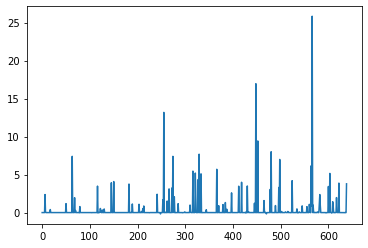

In [1570]:
plt.plot(preds)

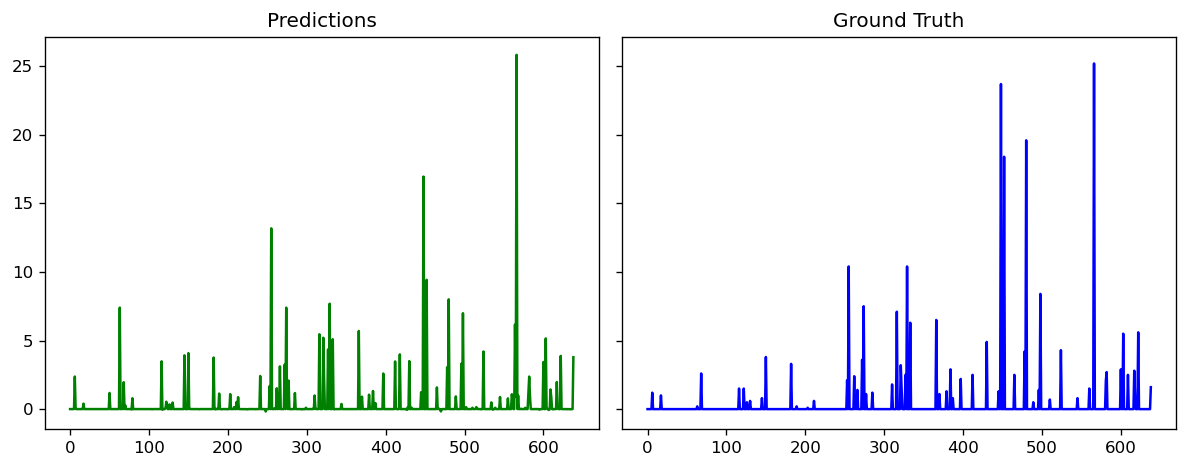

In [1571]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(preds, 'g')  # greendots
ax2.plot(y_2_test, 'b')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Predictions'); ax2.set_title('Ground Truth')

  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

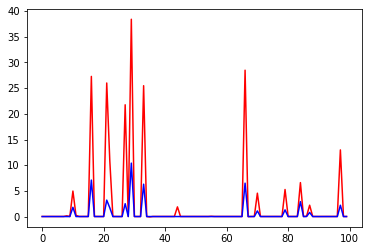

In [1572]:
temp_true  = np.copy(y_2_test)
#temp_true[temp_true > 0] = 5
#preds[preds > 0] = 2
plt.plot(preds[300:400] * 5,'r', label='Prediction')
plt.plot(temp_true[300:400],'b', label='Ground Truth')
plt.show()

In [1573]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [1574]:
temp_y_train = np.copy(y_2_train)
temp_y_test = np.copy(y_2_test)
temp_y_train[temp_y_train > 5] = 5.0
temp_y_test[temp_y_train > 5] = 5.0


IndexError: boolean index did not match indexed array along dimension 0; dimension is 639 but corresponding boolean dimension is 2552

In [1575]:
import keras
from keras.layers import Dense
model = keras.Sequential()
#model.add(Dense(69, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(12, kernel_initializer='normal', activation='relu', input_shape=(23,)))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
model.compile(loss='mse', optimizer='Adam', metrics='mse', )
model.fit(X_train, y_2_train, validation_data=(X_test, y_2_test), verbose=1, epochs=300, batch_size=64, shuffle=True)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test)


Epoch 1/300
40/40 [==============================] - 1s 5ms/step - loss: 7.9190 - mse: 7.9190 - val_loss: 4.0857 - val_mse: 4.0857
Epoch 2/300
40/40 [==============================] - 0s 2ms/step - loss: 7.6264 - mse: 7.6264 - val_loss: 3.7303 - val_mse: 3.7303
Epoch 3/300
40/40 [==============================] - 0s 2ms/step - loss: 6.8431 - mse: 6.8431 - val_loss: 3.0595 - val_mse: 3.0595
Epoch 4/300
40/40 [==============================] - 0s 2ms/step - loss: 5.5469 - mse: 5.5469 - val_loss: 2.2172 - val_mse: 2.2172
Epoch 5/300
40/40 [==============================] - 0s 2ms/step - loss: 4.1351 - mse: 4.1351 - val_loss: 1.8859 - val_mse: 1.8859
Epoch 6/300
40/40 [==============================] - 0s 2ms/step - loss: 3.3558 - mse: 3.3558 - val_loss: 1.8782 - val_mse: 1.8782
Epoch 7/300
40/40 [==============================] - 0s 2ms/step - loss: 2.9922 - mse: 2.9922 - val_loss: 1.7619 - val_mse: 1.7619
Epoch 8/300
40/40 [==============================] - 0s 2ms/step - loss: 2.6966 - m

40/40 [==============================] - 0s 2ms/step - loss: 0.7480 - mse: 0.7480 - val_loss: 0.6365 - val_mse: 0.6365
Epoch 64/300
40/40 [==============================] - 0s 2ms/step - loss: 0.7357 - mse: 0.7357 - val_loss: 0.6363 - val_mse: 0.6363
Epoch 65/300
40/40 [==============================] - 0s 2ms/step - loss: 0.7619 - mse: 0.7619 - val_loss: 0.6547 - val_mse: 0.6547
Epoch 66/300
40/40 [==============================] - 0s 2ms/step - loss: 0.7564 - mse: 0.7564 - val_loss: 0.6291 - val_mse: 0.6291
Epoch 67/300
40/40 [==============================] - 0s 2ms/step - loss: 0.7403 - mse: 0.7403 - val_loss: 0.6354 - val_mse: 0.6354
Epoch 68/300
40/40 [==============================] - 0s 2ms/step - loss: 0.7365 - mse: 0.7365 - val_loss: 0.6438 - val_mse: 0.6438
Epoch 69/300
40/40 [==============================] - 0s 2ms/step - loss: 0.7263 - mse: 0.7263 - val_loss: 0.6333 - val_mse: 0.6333
Epoch 70/300
40/40 [==============================] - 0s 2ms/step - loss: 0.7356 - mse: 0

Epoch 125/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6358 - mse: 0.6358 - val_loss: 0.6785 - val_mse: 0.6785
Epoch 126/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6306 - mse: 0.6306 - val_loss: 0.6468 - val_mse: 0.6468
Epoch 127/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6336 - mse: 0.6336 - val_loss: 0.6625 - val_mse: 0.6625
Epoch 128/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6319 - mse: 0.6319 - val_loss: 0.6674 - val_mse: 0.6674
Epoch 129/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6300 - mse: 0.6300 - val_loss: 0.6835 - val_mse: 0.6835
Epoch 130/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6221 - mse: 0.6221 - val_loss: 0.6526 - val_mse: 0.6526
Epoch 131/300
40/40 [==============================] - 0s 2ms/step - loss: 0.6233 - mse: 0.6233 - val_loss: 0.7121 - val_mse: 0.7121
Epoch 132/300
40/40 [==============================] - 0s 2ms/step - 

40/40 [==============================] - 0s 3ms/step - loss: 0.5673 - mse: 0.5673 - val_loss: 0.6777 - val_mse: 0.6777
Epoch 187/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5599 - mse: 0.5599 - val_loss: 0.7163 - val_mse: 0.7163
Epoch 188/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5616 - mse: 0.5616 - val_loss: 0.7133 - val_mse: 0.7133
Epoch 189/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5522 - mse: 0.5522 - val_loss: 0.6955 - val_mse: 0.6955
Epoch 190/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5659 - mse: 0.5659 - val_loss: 0.6797 - val_mse: 0.6797
Epoch 191/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5529 - mse: 0.5529 - val_loss: 0.6990 - val_mse: 0.6990
Epoch 192/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5606 - mse: 0.5606 - val_loss: 0.7394 - val_mse: 0.7394
Epoch 193/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5579 -

Epoch 248/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5044 - mse: 0.5044 - val_loss: 0.7340 - val_mse: 0.7340
Epoch 249/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5051 - mse: 0.5051 - val_loss: 0.7553 - val_mse: 0.7553
Epoch 250/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5064 - mse: 0.5064 - val_loss: 0.7409 - val_mse: 0.7409
Epoch 251/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5086 - mse: 0.5086 - val_loss: 0.7319 - val_mse: 0.7319
Epoch 252/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5032 - mse: 0.5032 - val_loss: 0.7487 - val_mse: 0.7487
Epoch 253/300
40/40 [==============================] - 0s 2ms/step - loss: 0.5005 - mse: 0.5005 - val_loss: 0.7599 - val_mse: 0.7599
Epoch 254/300
40/40 [==============================] - 0s 4ms/step - loss: 0.5037 - mse: 0.5037 - val_loss: 0.7619 - val_mse: 0.7619
Epoch 255/300
40/40 [==============================] - 0s 4ms/step - 

In [1578]:
mean_squared_error(y_2_test, preds)

0.7962904662708908

In [1579]:
mean_absolute_error(y_2_test, preds)

0.21334749822160853

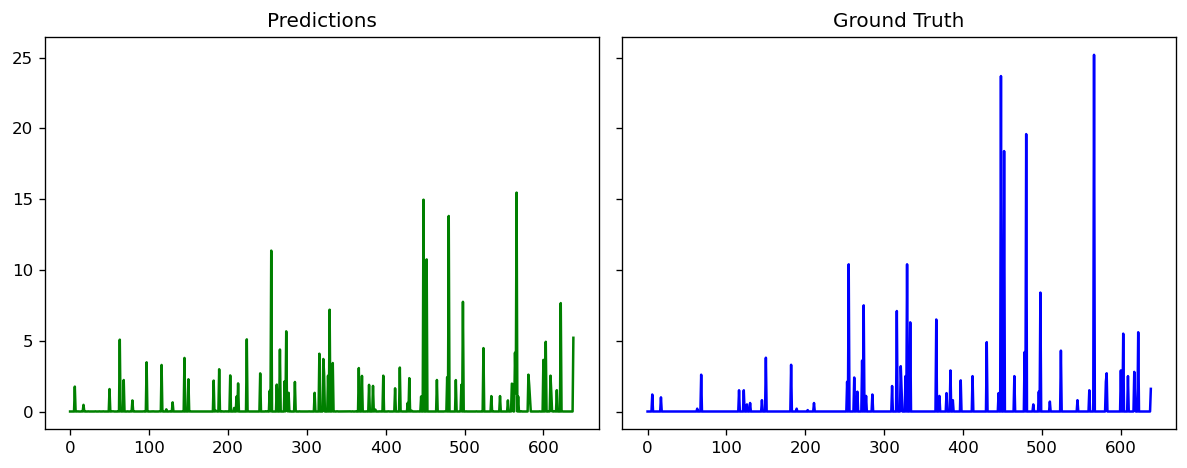

In [1581]:
# Create Figure and Subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, dpi=120)

# Plot
ax1.plot(preds, 'g')  # greendots
ax2.plot(y_2_test, 'b')  # bluestart

# Title, X and Y labels, X and Y Lim
ax1.set_title('Predictions'); ax2.set_title('Ground Truth')

  # y axis limits

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

In [1542]:
classifier.feature_importances_

array([  1,   5,  19,   4,   1,   1,   0,   4,   4,   0,   0,   0,   0,
         0,   0,   1,  22,   8,  39,  27, 272, 164, 328])

In [1543]:
features = ['HR-1', 'HR-2', 'HR-3', 'HR-4', 'HR-5', 'PB-1', 'PB-2', 'PB-3', 'PB-4','PB-5', 'T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'VV-1', 'VV-2', 'VV-3','VV-4', 'VV-5', 'vol', 'intensity']

ValueError: shape mismatch: objects cannot be broadcast to a single shape

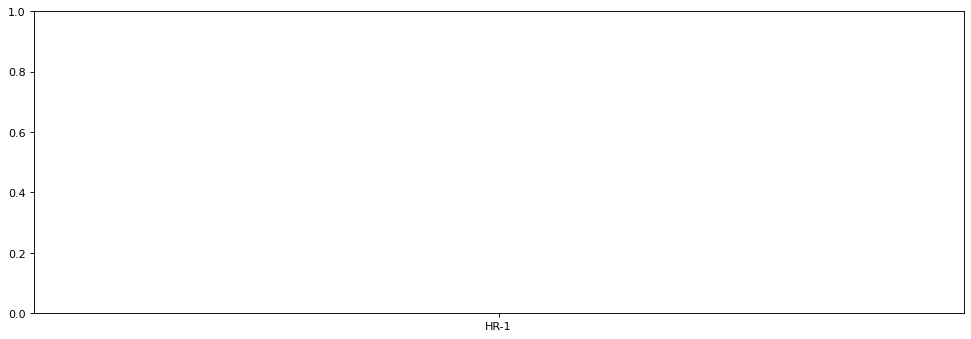

In [1544]:
plt.figure(figsize=(15, 5), dpi=80)

plt.bar(features, classifier.feature_importances_ / np.sum(classifier.feature_importances_))

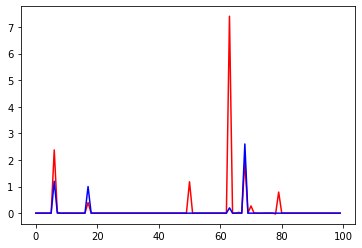

In [1545]:
temp_true  = np.copy(y_2_test)
#temp_true[temp_true > 0] = 5
#preds[preds > 0] = 2
plt.plot(preds[0:100],'r', label='Prediction')
plt.plot(temp_true[0:100],'b', label='Ground Truth')
plt.show()

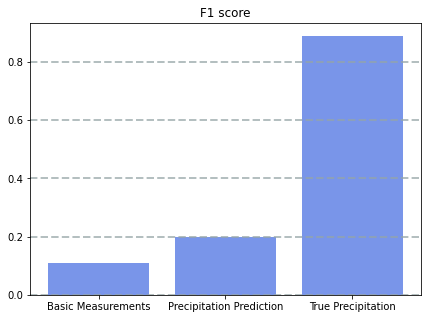

In [1590]:
data = [0.11, 0.198, 0.89]

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)

x = ['Basic Measurements', 'Precipitation Prediction', 'True Precipitation']
plt.xticks(range(len(data)), x)

plt.bar(range(len(x)), data, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("F1 score")
plt.show()